In [95]:
import bagpy
from bagpy import bagreader

## Individual Data

In [96]:
stationary_individual = bagreader('../Data/stationary_laleth.bag')


[INFO]  Data folder ../Data/stationary_laleth already exists. Not creating.


In [97]:
stationary_individual.topic_table

Topics                 Types  Message Count  Frequency
0   /imu  imu_driver/Vectornav          12075  23.417998

In [98]:
imu_ind = stationary_individual.message_by_topic('/imu')


In [99]:
import pandas as pd
df= pd.read_csv('../Data/stationary_laleth/imu.csv')


In [100]:
df.tail()

Time  Header.seq  Header.stamp.secs  Header.stamp.nsecs  \
12070  1.677953e+09       32562         1677953109           783268690   
12071  1.677953e+09       32563         1677953109           808231592   
12072  1.677953e+09       32564         1677953109           833246946   
12073  1.677953e+09       32565         1677953109           858099699   
12074  1.677953e+09       32566         1677953109           883114576   

      Header.frame_id  imu.header.seq  imu.header.stamp.secs  \
12070      imu1_frame               0                      0   
12071      imu1_frame               0                      0   
12072      imu1_frame               0                      0   
12073      imu1_frame               0                      0   
12074      imu1_frame               0                      0   

       imu.header.stamp.nsecs  imu.header.frame_id  imu.orientation.x  ...  \
12070                       0                  NaN          -0.076094  ...   
12071                       0                  NaN          -0.076081  ...   
12072                       0                  NaN          -0.076073  ...   
12073                       0                  NaN          -0.076086  ...   
12074                       0                  NaN          -0.076086  ...   

                  imu.linear_acceleration_covariance  mag_field.header.seq  \
12070  (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)                     0   
12071  (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)                     0   
12072  (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)                     0   
12073  (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)                     0   
12074  (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)                     0   

       mag_field.header.stamp.secs mag_field.header.stamp.nsecs  \
12070                            0                            0   
12071                            0                            0   
12072                            0                            0   
12073                            0                            0   
12074                            0                            0   

       mag_field.header.frame_id  mag_field.magnetic_field.x  \
12070                        NaN                      0.0040   
12071                        NaN                      0.0112   
12072                        NaN                      0.0040   
12073                        NaN                      0.0053   
12074                        NaN                      0.0064   

       mag_field.magnetic_field.y mag_field.magnetic_field.z  \
12070                     -0.3186                     0.3290   
12071                     -0.3175                     0.3360   
12072                     -0.3162                     0.3223   
12073                     -0.3086                     0.3262   
12074                     -0.3149                     0.3304   

                 mag_field.magnetic_field_covariance  \
12070  (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)   
12071  (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)   
12072  (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)   
12073  (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)   
12074  (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)   

                                            imu_raw_data  
12070  $VNYMR,+088.593,-002.269,-014.420,+00.0040,-00...  
12071  $VNYMR,+088.593,-002.269,-014.418,+00.0112,-00...  
12072  $VNYMR,+088.595,-002.270,-014.418,+00.0040,-00...  
12073  $VNYMR,+088.595,-002.269,-014.419,+00.0053,-00...  
12074  $VNYMR,+088.595,-002.269,-014.419,+00.0064,-00...  

[5 rows x 31 columns]

## Time series of gyro

In [101]:
import plotly.express as px
import numpy as np
# Scatterplots of the Northing vs. Easting data
fig = px.scatter_3d(df, x="imu.linear_acceleration.x", y="imu.linear_acceleration.y", z = "imu.linear_acceleration.z")
fig.update_traces(marker_size = 2)
fig.show()

## Time series of accel

In [102]:
# Comparision between gps and google map position
fig = px.scatter_3d(df, x="imu.angular_velocity.x", y="imu.angular_velocity.y", z = "imu.angular_velocity.z")
fig.update_traces(marker_size = 2)
fig.show()

## Time series of orientation

In [103]:
import math 

gyro_x = []
gyro_y = []
gyro_z = []

for i in range(len(df)):
    x = df["imu.orientation.x"][i]
    y = df["imu.orientation.y"][i]
    z = df["imu.orientation.z"][i]
    w = df["imu.orientation.w"][i]

    R = np.array([[1-2*(y**2+z**2), 2*(x*y-z*w), 2*(x*z+y*w)],
                  [2*(x*y+z*w), 1-2*(x**2+z**2), 2*(y*z-x*w)],
                  [2*(x*z-y*w), 2*(y*z+x*w), 1-2*(x**2+y**2)]])
    
    roll = math.atan2(R[2,1], R[2,2])
    pitch = -math.asin(R[2,0])
    yaw = math.atan2(R[1,0], R[0,0])
    gyro_x.append(roll)
    gyro_y.append(pitch)
    gyro_z.append(yaw)

df["gyro_x"] = gyro_x
df["gyro_y"] = gyro_y
df["gyro_z"] = gyro_z

In [104]:
# Comparision between gps and google map position
fig = px.scatter_3d(x=gyro_x, y=gyro_y, z = gyro_z)
fig.update_traces(marker_size = 2)
fig.show()

In [105]:
print("mean x = ",df["gyro_x"].mean())
print("mean y = ",df["gyro_y"].mean())
print("mean z = ",df["gyro_z"].mean())

print("median x = ",df["gyro_x"].median())
print("median y = ",df["gyro_y"].median())
print("median z = ",df["gyro_z"].median())

mean x =  -0.25144407688780074
mean y =  -0.040068432076489205
mean z =  1.54733330990125
median x =  -0.251449585334823
median y =  -0.0401076662108297
median z =  1.547269288478013


## Distribution of accel x

array([[<AxesSubplot: title={'center': 'imu.linear_acceleration.x'}>]],
      dtype=object)

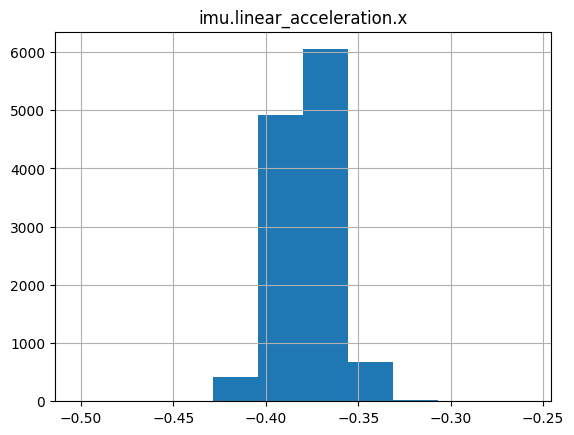

In [106]:
df.hist(column='imu.linear_acceleration.x')

## Group data

In [107]:
group_data = bagreader('../Data/motion_data.bag')
group_data.topic_table
imu_ind = group_data.message_by_topic('/imu')


[INFO]  Data folder ../Data/motion_data already exists. Not creating.


In [108]:
df1= pd.read_csv('../Data/motion_data/imu.csv')
df1.head(250)

Time  Header.seq  Header.stamp.secs  Header.stamp.nsecs  \
0    1.678038e+09        7628         1678037832           330540895   
1    1.678038e+09        7629         1678037832           355560541   
2    1.678038e+09        7630         1678037832           381325006   
3    1.678038e+09        7631         1678037832           406232118   
4    1.678038e+09        7632         1678037832           431140661   
..            ...         ...                ...                 ...   
245  1.678038e+09        7873         1678037838           456455230   
246  1.678038e+09        7874         1678037838           481378555   
247  1.678038e+09        7875         1678037838           506265640   
248  1.678038e+09        7876         1678037838           531243562   
249  1.678038e+09        7877         1678037838           556208133   

    Header.frame_id  imu.header.seq  imu.header.stamp.secs  \
0        imu1_frame               0                      0   
1        imu1_frame               0                      0   
2        imu1_frame               0                      0   
3        imu1_frame               0                      0   
4        imu1_frame               0                      0   
..              ...             ...                    ...   
245      imu1_frame               0                      0   
246      imu1_frame               0                      0   
247      imu1_frame               0                      0   
248      imu1_frame               0                      0   
249      imu1_frame               0                      0   

     imu.header.stamp.nsecs  imu.header.frame_id  imu.orientation.x  ...  \
0                         0                  NaN          -0.255097  ...   
1                         0                  NaN          -0.255895  ...   
2                         0                  NaN          -0.255580  ...   
3                         0                  NaN          -0.254032  ...   
4                         0                  NaN          -0.252770  ...   
..                      ...                  ...                ...  ...   
245                       0                  NaN          -0.232806  ...   
246                       0                  NaN          -0.234143  ...   
247                       0                  NaN          -0.234156  ...   
248                       0                  NaN          -0.233797  ...   
249                       0                  NaN          -0.234459  ...   

                imu.linear_acceleration_covariance  mag_field.header.seq  \
0    (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)                     0   
1    (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)                     0   
2    (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)                     0   
3    (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)                     0   
4    (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)                     0   
..                                             ...                   ...   
245  (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)                     0   
246  (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)                     0   
247  (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)                     0   
248  (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)                     0   
249  (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)                     0   

     mag_field.header.stamp.secs mag_field.header.stamp.nsecs  \
0                              0                            0   
1                              0                            0   
2                              0                            0   
3                              0                            0   
4                              0                            0   
..                           ...                          ...   
245                            0                            0   
246                            0                         

In [109]:
import plotly.graph_objects as go

# Create figure
fig = go.Figure(
    data=[go.Scatter3d(x=[], y=[], z=[],
                     mode="markers",marker=dict(color="red", size=5))])

fig.update_layout(
        
         scene = dict(
        
        xaxis=dict( autorange=True),
        yaxis=dict( autorange=True),
        zaxis=dict( autorange=True),
        )),

frames = [go.Frame(data= [go.Scatter3d(
                                       x=df1["imu.linear_acceleration.x"][:k+1], 
                                       y=df1["imu.linear_acceleration.y"][:k+1],
                                       z=df1["imu.linear_acceleration.z"][:k+1])],
                   
                   traces= [0],
                   name=f'frame{k}'      
                  )for k  in  range(250)]
fig.update(frames=frames),




fig.update_layout(updatemenus=[dict(type="buttons",
                          buttons=[dict(label="Play",
                                        method="animate",
                                        args=[None])])])
fig.update_layout(title_text='First 6 Seconds in video - plotiing linear accleration')

fig.show()

In [110]:
from IPython.display import Video

Video("First 6 seconds.mp4")

In [113]:
fig = go.Figure(
    data=[go.Scatter3d(x=[], y=[], z=[],
                     mode="markers",marker=dict(color="red", size=5))])

fig.update_layout(
        
         scene = dict(
        
        xaxis=dict( autorange=True),
        yaxis=dict( autorange=True),
        zaxis=dict( autorange=True),
        )),

frames = [go.Frame(data= [go.Scatter3d(
                                       x=df1["imu.angular_velocity.x"][251:k+1], 
                                       y=df1["imu.angular_velocity.y"][251:k+1],
                                       z=df1["imu.angular_velocity.z"][251:k+1])],
                   
                   traces= [0],
                   name=f'frame{k}'      
                  )for k  in  range(0,250)]
fig.update(frames=frames),




fig.update_layout(updatemenus=[dict(type="buttons",
                          buttons=[dict(label="Play",
                                        method="animate",
                                        args=[None])])])

fig.update_layout(title_text='First 6 Seconds in video - angular velocity')

fig.show()

In [111]:
fig = go.Figure(
    data=[go.Scatter3d(x=[], y=[], z=[],
                     mode="markers",marker=dict(color="red", size=5))])

fig.update_layout(
        
         scene = dict(
        
        xaxis=dict( autorange=True),
        yaxis=dict( autorange=True),
        zaxis=dict( autorange=True),
        )),

frames = [go.Frame(data= [go.Scatter3d(
                                       x=df1["imu.linear_acceleration.x"][251:k+1], 
                                       y=df1["imu.linear_acceleration.y"][251:k+1],
                                       z=df1["imu.linear_acceleration.z"][251:k+1])],
                   
                   traces= [0],
                   name=f'frame{k}'      
                  )for k  in  range(251,500)]
fig.update(frames=frames),




fig.update_layout(updatemenus=[dict(type="buttons",
                          buttons=[dict(label="Play",
                                        method="animate",
                                        args=[None])])])

fig.update_layout(title_text='6-12 seconds Seconds in video - plotiing linear accleration')

fig.show()

In [112]:
Video("next 6 seconds.mp4")

In [114]:
fig = go.Figure(
    data=[go.Scatter3d(x=[], y=[], z=[],
                     mode="markers",marker=dict(color="red", size=5))])

fig.update_layout(
        
         scene = dict(
        
        xaxis=dict( autorange=True),
        yaxis=dict( autorange=True),
        zaxis=dict( autorange=True),
        )),

frames = [go.Frame(data= [go.Scatter3d(
                                       x=df1["imu.angular_velocity.x"][:k+1], 
                                       y=df1["imu.angular_velocity.y"][:k+1],
                                       z=df1["imu.angular_velocity.z"][:k+1])],
                   
                   traces= [0],
                   name=f'frame{k}'      
                  )for k  in  range(0,250)]
fig.update(frames=frames),




fig.update_layout(updatemenus=[dict(type="buttons",
                          buttons=[dict(label="Play",
                                        method="animate",
                                        args=[None])])])


fig.show()